# Google Analytics user_prediction challenge 

## Cleaning Data

In [1]:
# download the libraries
import pandas as pd
from pandas import Series,DataFrame
import warnings
from copy import deepcopy
import os
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
%matplotlib inline

In [2]:
# load both of the datasets
traindata = pd.read_pickle('train_flat_no_hits.pkl')
testdata = pd.read_pickle('test_flat_no_hits.pkl')

In [3]:
# add a marker so that you know which dataset is which
traindata['dataset'] = 'train'
testdata['dataset'] = 'test'


In [4]:
# See train columns
traindata.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserVersion', 'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.sessionQuality

In [5]:
# See test columns
testdata.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserVersion', 'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.timeOnSite',
       'totals.sessionQualityDim', 'totals.new

In [6]:
# make sure the columns are in the same order in both train and test.
# the deepcopy is just to have a copy of the original even after joining them
col_order = list(set(traindata.columns.tolist() + testdata.columns.tolist()))
traindata = deepcopy(traindata[col_order])
testdata = deepcopy(testdata[col_order])

KeyError: "['trafficSource.campaignCode'] not in index"

In [7]:
#the test doesnt have trafficSource.campaignCode column, so i droped it from the train set
traindata.drop('trafficSource.campaignCode',axis=1,inplace= True)

In [8]:
#Repeat 
col_order = list(set(traindata.columns.tolist() + testdata.columns.tolist()))
traindata = deepcopy(traindata[col_order])
testdata = deepcopy(testdata[col_order])

In [11]:
#Merge both data set
all_data = traindata[col_order].append(testdata)

In [12]:
# view the Merged dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109926 entries, 0 to 401588
Data columns (total 60 columns):
 #   Column                                             Dtype 
---  ------                                             ----- 
 0   device.operatingSystem                             object
 1   date                                               int64 
 2   device.mobileDeviceModel                           object
 3   device.mobileDeviceMarketingName                   object
 4   totals.hits                                        object
 5   totals.visits                                      object
 6   device.screenResolution                            object
 7   geoNetwork.longitude                               object
 8   geoNetwork.region                                  object
 9   trafficSource.keyword                              object
 10  socialEngagementType                               object
 11  totals.pageviews                                   object
 12  t

In [9]:
#define a function to look for missing data
def values_missing(check):
    total = check.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (check.isnull().sum() / check.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total and percent of missing values: ")
    print (df_train[~(df_train['Total'] == 0)]) # Returning values of nulls different of 0
    
    return

In [13]:
#define a function to investigate the columns  

def see_data(data, data_type=object, limit=5): #seting the function with data,show 5 uniques if available 
    n = data.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("_________________________________________________________")
        print("Column Name ", column, ': \n', "Uniques: ", data[column].unique()[:limit], "\n",
              " | >>>> Total nulls: ", (round(data[column].isnull().sum() / len(data[column]) * 100,1)),
              " | >>>> Total unique values: ", all_data.nunique()[column]) #print the data and % of nulls)
        print("_________________________________________________________")

In [14]:
#Check missing values
values_missing(all_data)

Total and percent of missing values: 
                                                Total    Percent
totals.transactionRevenue                     2086818  98.904796
totals.totalTransactionRevenue                2086818  98.904796
totals.transactions                           2085062  98.821570
trafficSource.adwordsClickInfo.slot           2024047  95.929762
trafficSource.adwordsClickInfo.page           2024047  95.929762
trafficSource.adwordsClickInfo.adNetworkType  2024047  95.929762
trafficSource.adwordsClickInfo.isVideoAd      2024047  95.929762
trafficSource.adwordsClickInfo.gclId          2023891  95.922369
trafficSource.adContent                       1643600  77.898467
trafficSource.isTrueDirect                    1426999  67.632656
trafficSource.referralPath                    1142073  54.128581
trafficSource.keyword                         1093006  51.803049
totals.timeOnSite                             1057980  50.142991
totals.bounces                                105567

In [15]:
see_data(all_data)

_________________________________________________________
Column Name  device.operatingSystem : 
 Uniques:  ['Windows' 'Chrome OS' 'Android' 'Macintosh' 'iOS'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  26
_________________________________________________________
_________________________________________________________
Column Name  device.mobileDeviceModel : 
 Uniques:  ['not available in demo dataset'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  1
_________________________________________________________
_________________________________________________________
Column Name  device.mobileDeviceMarketingName : 
 Uniques:  ['not available in demo dataset'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  1
_________________________________________________________
_________________________________________________________
Column Name  totals.hits : 
 Uniques:  ['1' '2' '3' '4' '5'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  308
________

In [ ]:
# decision  process to drop some coluns with unique values(mostly 'not in the demoset') while some will left.

In [16]:
drop_col_list = ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion',
                 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 
                 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 
                 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 
                 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'trafficSource.campaign', 'trafficSource.referralPath', 
                 'trafficSource.adwordsClickInfo.slot', 
                 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.gclId', 
                 'customDimension.index']

In [17]:
all_data.drop(drop_col_list, axis=1, inplace=True)  #to drop them

In [18]:
# filling relevant columns

In [19]:
all_data['totals.pageviews'].fillna(0, inplace=True) #filling NA's with 1(since least for a visit to the site means 1 page seen)
all_data['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
all_data['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0(0 is suitable for Nan here)
all_data["totals.transactionRevenue"] = all_data["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.totalTransactionRevenue"] = all_data["totals.totalTransactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.transactionRevenue"] = all_data["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.transactions"] = all_data["totals.transactions"].fillna(0).astype(int) #filling NA with zero
all_data['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
all_data['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean is its NAn
all_data['trafficSource.adwordsClickInfo.page'].fillna(0,inplace=True)
all_data['customDimension.value'].fillna('(not set)', inplace=True) # filling NA with '(not set)'
all_data['trafficSource.adwordsClickInfo.adNetworkType'].fillna('(not set)', inplace=True) # filling NA with '(not set)'
all_data['totals.timeOnSite'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
all_data['totals.sessionQualityDim'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
#To convert
all_data['totals.pageviews'] = all_data['totals.pageviews'].astype(int) # setting numerical column as integer
all_data['totals.newVisits'] = all_data['totals.newVisits'].astype(int) # setting numerical column as integer
all_data['totals.bounces'] = all_data['totals.bounces'].astype(int)  # setting numerical column as integer
all_data["totals.hits"] = all_data["totals.hits"].astype(float) # setting numerical to float
all_data['totals.sessionQualityDim'] = all_data['totals.sessionQualityDim'].astype(int)
all_data['totals.timeOnSite'] = all_data['totals.timeOnSite'].astype(int)
all_data['date'] = pd.to_datetime(all_data["date"], format="%Y%m%d") #convert to datetime
all_data['geoNetwork.metro'].replace({"not available in demo dataset": "(not set)"}, inplace=True)
all_data['geoNetwork.metro'].replace({"not available in demo dataset": "(not set)"}, inplace=True)

In [20]:
#view the dataset after dropping and modifying
all_data.head()

device.operatingSystem       date  totals.hits totals.visits  \
0                Windows 2017-10-16          1.0             1   
1              Chrome OS 2017-10-16          2.0             1   
2                Android 2017-10-16          2.0             1   
3                Windows 2017-10-16          2.0             1   
4                Windows 2017-10-16          2.0             1   

               geoNetwork.region trafficSource.keyword  totals.pageviews  \
0  not available in demo dataset          water bottle                 1   
1                     California                   NaN                 2   
2  not available in demo dataset                   NaN                 2   
3  not available in demo dataset        (not provided)                 2   
4  not available in demo dataset        (not provided)                 2   

   totals.totalTransactionRevenue  trafficSource.isTrueDirect  \
0                             0.0                       False   
1                             0.0                       False   
2                             0.0                        True   
3                             0.0                       False   
4                             0.0                       False   

   trafficSource.adwordsClickInfo.isVideoAd  ... totals.newVisits  \
0                                      True  ...                1   
1                                      True  ...                0   
2                                      True  ...                1   
3                                      True  ...                1   
4                                      True  ...                1   

         fullVisitorId device.browser customDimension.value  \
0  3162355547410993243        Firefox                  EMEA   
1  8934116514970143966         Chrome         North America   
2  7992466427990357681         Chrome         North America   
3  9075655783635761930         Chrome                  EMEA   
4  6960673291025684308         Chrome       Central America   

   device.deviceCategory  trafficSource.medium  \
0                desktop               organic   
1                desktop              referral   
2                 mobile                (none)   
3                desktop               organic   
4                desktop               organic   

  trafficSource.adwordsClickInfo.adNetworkType  device.isMobile  \
0                                    (not set)            False   
1                                    (not set)            False   
2                                    (not set)             True   
3                                    (not set)            False   
4                                    (not set)            False   

   trafficSource.adwordsClickInfo.page                   geoNetwork.metro  
0                                    0                          (not set)  
1                                    0  San Francisco-Oakland-San Jose CA  
2                                    0                          (not set)  
3                                    0                          (not set)  
4                                    0                          (not set)  

[5 rows x 36 columns]

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109926 entries, 0 to 401588
Data columns (total 36 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   device.operatingSystem                        object        
 1   date                                          datetime64[ns]
 2   totals.hits                                   float64       
 3   totals.visits                                 object        
 4   geoNetwork.region                             object        
 5   trafficSource.keyword                         object        
 6   totals.pageviews                              int32         
 7   totals.totalTransactionRevenue                float64       
 8   trafficSource.isTrueDirect                    bool          
 9   trafficSource.adwordsClickInfo.isVideoAd      bool          
 10  channelGrouping                               object        
 11  visitStartTime           

In [31]:
#to save as pickle
all_data.to_csv('/Users/chris/Desktop/chris_files.csv/fulldata.csv',index=False)

# FEATURES ENGINEERING

In [ ]:
# this approach is important towards getting the best predictive features for the target
#first i copy the a dataset from thee original

In [32]:
rfr = deepcopy(all_data)

In [ ]:
# now we begin to creat new features while modify others for the model i intend to use but according to the competition rules

In [5]:
rfr["date"] = pd.to_datetime(rfr["date"])   
rfr["year"] = rfr['date'].dt.year
rfr["month"] = rfr['date'].dt.month
rfr["day"] = rfr['date'].dt.day
rfr["weekday"] = rfr['date'].dt.weekday
rfr['weekofyear'] = rfr['date'].dt.weekofyear
rfr['month_unique_user_count'] = rfr.groupby('month')['fullVisitorId'].transform('nunique')
rfr['day_unique_user_count'] = rfr.groupby('day')['fullVisitorId'].transform('nunique')
rfr['weekday_unique_user_count'] = rfr.groupby('weekday')['fullVisitorId'].transform('nunique')

In [6]:
rfr['mean_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('mean')
rfr['sum_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('sum')
rfr['max_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('max')
rfr['min_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('min')
rfr['var_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('var')

In [7]:
rfr['browser.category'] = rfr['device.browser'] + '_' + rfr['device.deviceCategory']
rfr['browser.operatingSystem'] = rfr['device.browser'] + '_' + rfr['device.operatingSystem']
rfr['source.country'] = rfr['trafficSource.source'] + '_' + rfr['geoNetwork.country']

In [8]:
rfr['sum_pageviews.per.network.domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('sum')
rfr['count_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('count')
rfr['mean_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('mean')

In [9]:
rfr['sum_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('sum')
rfr['count_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('count')
rfr['mean_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('mean')

In [10]:
for col in ['visitNumber', 'totals.hits', 'totals.pageviews']:
    rfr[col] = rfr[col].astype(float)

In [11]:
rfr['visitNumber'] = np.log1p(rfr['visitNumber'])
rfr['totals.hits'] = np.log1p(rfr['totals.hits'])
rfr['totals.pageviews'] = np.log1p(rfr['totals.pageviews'])
rfr["totals.transactionRevenue"] = np.log1p(rfr["totals.transactionRevenue"].astype(float))
rfr["totals.totalTransactionRevenue"] = np.log1p(rfr["totals.totalTransactionRevenue"].astype(float))

# PREDICTIVE MODEL WITH RANDOM FOREST REGRESSOR

In [40]:
# viewing the dataset
rfr.head(5)

device.operatingSystem       date  totals.hits totals.visits  \
0                Windows 2017-10-16     0.693147             1   
1              Chrome OS 2017-10-16     1.098612             1   
2                Android 2017-10-16     1.098612             1   
3                Windows 2017-10-16     1.098612             1   
4                Windows 2017-10-16     1.098612             1   

               geoNetwork.region trafficSource.keyword  totals.pageviews  \
0  not available in demo dataset          water bottle          0.693147   
1                     California                   NaN          1.098612   
2  not available in demo dataset                   NaN          1.098612   
3  not available in demo dataset        (not provided)          1.098612   
4  not available in demo dataset        (not provided)          1.098612   

   totals.totalTransactionRevenue  trafficSource.isTrueDirect  \
0                             0.0                       False   
1                             0.0                       False   
2                             0.0                        True   
3                             0.0                       False   
4                             0.0                       False   

   trafficSource.adwordsClickInfo.isVideoAd  ... var_hits_per_day  \
0                                      True  ...        77.185784   
1                                      True  ...        77.185784   
2                                      True  ...        77.185784   
3                                      True  ...        77.185784   
4                                      True  ...        77.185784   

   browser.category browser.operatingSystem                  source.country  \
0   Firefox_desktop         Firefox_Windows                  google_Germany   
1    Chrome_desktop        Chrome_Chrome OS  sites.google.com_United States   
2     Chrome_mobile          Chrome_Android          (direct)_United States   
3    Chrome_desktop          Chrome_Windows                   google_Turkey   
4    Chrome_desktop          Chrome_Windows                   google_Mexico   

   sum_pageviews.per.network.domain  count_pageviews_per_network_domain  \
0                           2981366                              637027   
1                           2981366                              637027   
2                                39                                  19   
3                            950613                              326745   
4                             28093                               11071   

  mean_pageviews_per_network_domain  sum_hits_per_network_domain  \
0                          4.680125                    3646484.0   
1                          4.680125                    3646484.0   
2                          2.052632                         46.0   
3                          2.909342                    1133577.0   
4                          2.537530                      32891.0   

   count_hits_per_network_domain mean_hits_per_network_domain  
0                         637027                     5.724222  
1                         637027                     5.724222  
2                             19                     2.421053  
3                         326745                     3.469302  
4                          11071                     2.970915  

[5 rows x 58 columns]

In [41]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109926 entries, 0 to 401588
Data columns (total 58 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   device.operatingSystem                        object        
 1   date                                          datetime64[ns]
 2   totals.hits                                   float64       
 3   totals.visits                                 object        
 4   geoNetwork.region                             object        
 5   trafficSource.keyword                         object        
 6   totals.pageviews                              float64       
 7   totals.totalTransactionRevenue                float64       
 8   trafficSource.isTrueDirect                    bool          
 9   trafficSource.adwordsClickInfo.isVideoAd      bool          
 10  channelGrouping                               object        
 11  visitStartTime           

In [12]:
#Seperate the categorical variable from the continuos variable
CAT_COLS = rfr.columns[rfr.dtypes == object]
CONT_COLS = [c for c in rfr.columns if c not in CAT_COLS ]

In [13]:
#view them
CAT_COLS

Index(['device.operatingSystem', 'geoNetwork.region', 'trafficSource.keyword',
       'channelGrouping', 'geoNetwork.country', 'geoNetwork.city',
       'trafficSource.source', 'dataset', 'geoNetwork.networkDomain',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'fullVisitorId',
       'device.browser', 'customDimension.value', 'device.deviceCategory',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.adNetworkType',
       'geoNetwork.metro', 'browser.category', 'browser.operatingSystem',
       'source.country'],
      dtype='object')

In [14]:
CONT_COLS

['date',
 'totals.hits',
 'totals.visits',
 'totals.pageviews',
 'totals.totalTransactionRevenue',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'visitStartTime',
 'totals.bounces',
 'totals.sessionQualityDim',
 'visitId',
 'totals.transactions',
 'visitNumber',
 'totals.transactionRevenue',
 'totals.timeOnSite',
 'totals.newVisits',
 'device.isMobile',
 'trafficSource.adwordsClickInfo.page',
 'year',
 'month',
 'day',
 'weekday',
 'weekofyear',
 'month_unique_user_count',
 'day_unique_user_count',
 'weekday_unique_user_count',
 'mean_hits_per_day',
 'sum_hits_per_day',
 'max_hits_per_day',
 'min_hits_per_day',
 'var_hits_per_day',
 'sum_pageviews.per.network.domain',
 'count_pageviews_per_network_domain',
 'mean_pageviews_per_network_domain',
 'sum_hits_per_network_domain',
 'count_hits_per_network_domain',
 'mean_hits_per_network_domain']

In [15]:
#check for unique columns
[col for col in rfr.columns if rfr[col].nunique == 1]

[]

## preparing data for model - labelling

In [16]:
#importing the needed lib
import gc, pickle
import plotly.express as px
import plotly.graph_objects as go
import ppscore as pps
#import shap, optuna
from pdpbox import pdp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
rmse = lambda true, pred: mse(true, pred) ** 0.5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA

In [17]:
# we need to indentify columns that we dont need. These columns like fullVisitorId 
not_label = [ "fullVisitorId"]

In [18]:
#begin with label encoding the categorical columns
to_label = ['device.operatingSystem', 'totals.visits', 'geoNetwork.region',
       'trafficSource.keyword', 'channelGrouping', 'geoNetwork.country',
       'geoNetwork.city', 'trafficSource.source', 'dataset',
       'geoNetwork.networkDomain', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'device.browser',
       'customDimension.value', 'device.deviceCategory',
       'trafficSource.medium', 'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.page', 'geoNetwork.metro',
       'browser.category', 'browser.operatingSystem', 'source.country']

In [19]:
for col in to_label:
    rfr_leb = LabelEncoder() 
    rfr[col] = rfr_leb.fit_transform(rfr[col].values.astype('str')) 

In [20]:
#see the transforms data
rfr.head()

device.operatingSystem       date  totals.hits  totals.visits  \
0                      22 2017-10-16     0.693147              0   
1                       3 2017-10-16     1.098612              0   
2                       1 2017-10-16     1.098612              0   
3                      22 2017-10-16     1.098612              0   
4                      22 2017-10-16     1.098612              0   

   geoNetwork.region  trafficSource.keyword  totals.pageviews  \
0                517                   3761          0.693147   
1                 74                   3086          1.098612   
2                517                   3086          1.098612   
3                517                      8          1.098612   
4                517                      8          1.098612   

   totals.totalTransactionRevenue  trafficSource.isTrueDirect  \
0                             0.0                       False   
1                             0.0                       False   
2                             0.0                        True   
3                             0.0                       False   
4                             0.0                       False   

   trafficSource.adwordsClickInfo.isVideoAd  ...  var_hits_per_day  \
0                                      True  ...         77.185784   
1                                      True  ...         77.185784   
2                                      True  ...         77.185784   
3                                      True  ...         77.185784   
4                                      True  ...         77.185784   

   browser.category  browser.operatingSystem  source.country  \
0                77                       90            2053   
1                62                       59            3951   
2                63                       57             207   
3                62                       65            2180   
4                62                       65            2107   

   sum_pageviews.per.network.domain  count_pageviews_per_network_domain  \
0                           2981366                              637027   
1                           2981366                              637027   
2                                39                                  19   
3                            950613                              326745   
4                             28093                               11071   

   mean_pageviews_per_network_domain  sum_hits_per_network_domain  \
0                           4.680125                    3646484.0   
1                           4.680125                    3646484.0   
2                           2.052632                         46.0   
3                           2.909342                    1133577.0   
4                           2.537530                      32891.0   

   count_hits_per_network_domain  mean_hits_per_network_domain  
0                         637027                      5.724222  
1                         637027                      5.724222  
2                             19                      2.421053  
3                         326745                      3.469302  
4                          11071                      2.970915  

[5 rows x 58 columns]

## 1st Test with model - Randomforest

In [21]:
#define function for evaluation .for RSME AND MAE
def get_error(pred, true):
    print(f'RMSE:       {rmse(true, pred)}')
    print(f'MAE:        {mae(true, pred)}')

In [22]:
#getting a coping of a datset for model
rff = deepcopy(rfr)

### test 1 on all data

In [23]:
#breaking the dataset with the marker('dataset')
rff['dataset'].value_counts()

1    1708337
0     401589
Name: dataset, dtype: int64

In [73]:
train_rff = rff[rff['dataset']==1]
test_rff = rff[rff['dataset']==0]
train_rff.drop('dataset',axis=1,inplace=True)
test_rff.drop('dataset',axis=1, inplace=True)

In [25]:
#Splitting test and trains
x_trn_rff = train_rff.drop(['totals.totalTransactionRevenue','date'],axis=1)
x_tst_rff = test_rff.drop(['totals.totalTransactionRevenue','date'],axis=1)
y_trn_rff = train_rff['totals.totalTransactionRevenue']
y_tst_rff = test_rff['totals.totalTransactionRevenue']

In [27]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(y_trn_rff) for _ in range(len(y_tst_rff))]),
          true = y_tst_rff)

RMSE:       1.9103202785490805
MAE:        0.39514840347721303


In [29]:
first_param = {'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [76]:
first_test = RandomForestRegressor(**first_param)

trained_rff= first_test.fit(x_trn_rff, y_trn_rff)

pred_rff = trained_rff.predict(x_tst_rff)

In [77]:
get_error(pred =pred_rff, true = y_tst_rff)

RMSE:       0.012802520584594192
MAE:        0.0007397223994596879


1st test puts Rmse of 0.012 against 1.91

### Test2 on actual buyers

In [38]:
purchased = rff[rff['totals.totalTransactionRevenue'] > 0 ]

In [39]:
purchased['dataset'].value_counts()

1    18514
0     4594
Name: dataset, dtype: int64

In [40]:
trainp = purchased[purchased['dataset']==1]
testp = purchased[purchased['dataset']==0]
trainp.drop('dataset',axis=1,inplace=True)
testp.drop('dataset',axis=1, inplace=True)

In [41]:
x_trainp = trainp.drop(['totals.totalTransactionRevenue','date'],axis=1)
x_testp = testp.drop(['totals.totalTransactionRevenue','date'],axis=1)
y_trainp = trainp['totals.totalTransactionRevenue']
y_testp = testp['totals.totalTransactionRevenue']

In [43]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(y_trainp) for _ in range(len(y_testp))]),
          true = y_testp)

RMSE:       1.0195114983828146
MAE:        0.7837113373882839


In [44]:
second_test = RandomForestRegressor(**first_param)

trained_rff2= second_test.fit(x_trainp, y_trainp)

pred_rff2 = trained_rff2.predict(x_testp)

In [45]:
get_error(pred =pred_rff2, true = y_testp)

RMSE:       0.11957132669600841
MAE:        0.06462692558578209


2nd test puts Rmse of 0.119 against 1.019  - purchased

## correlation

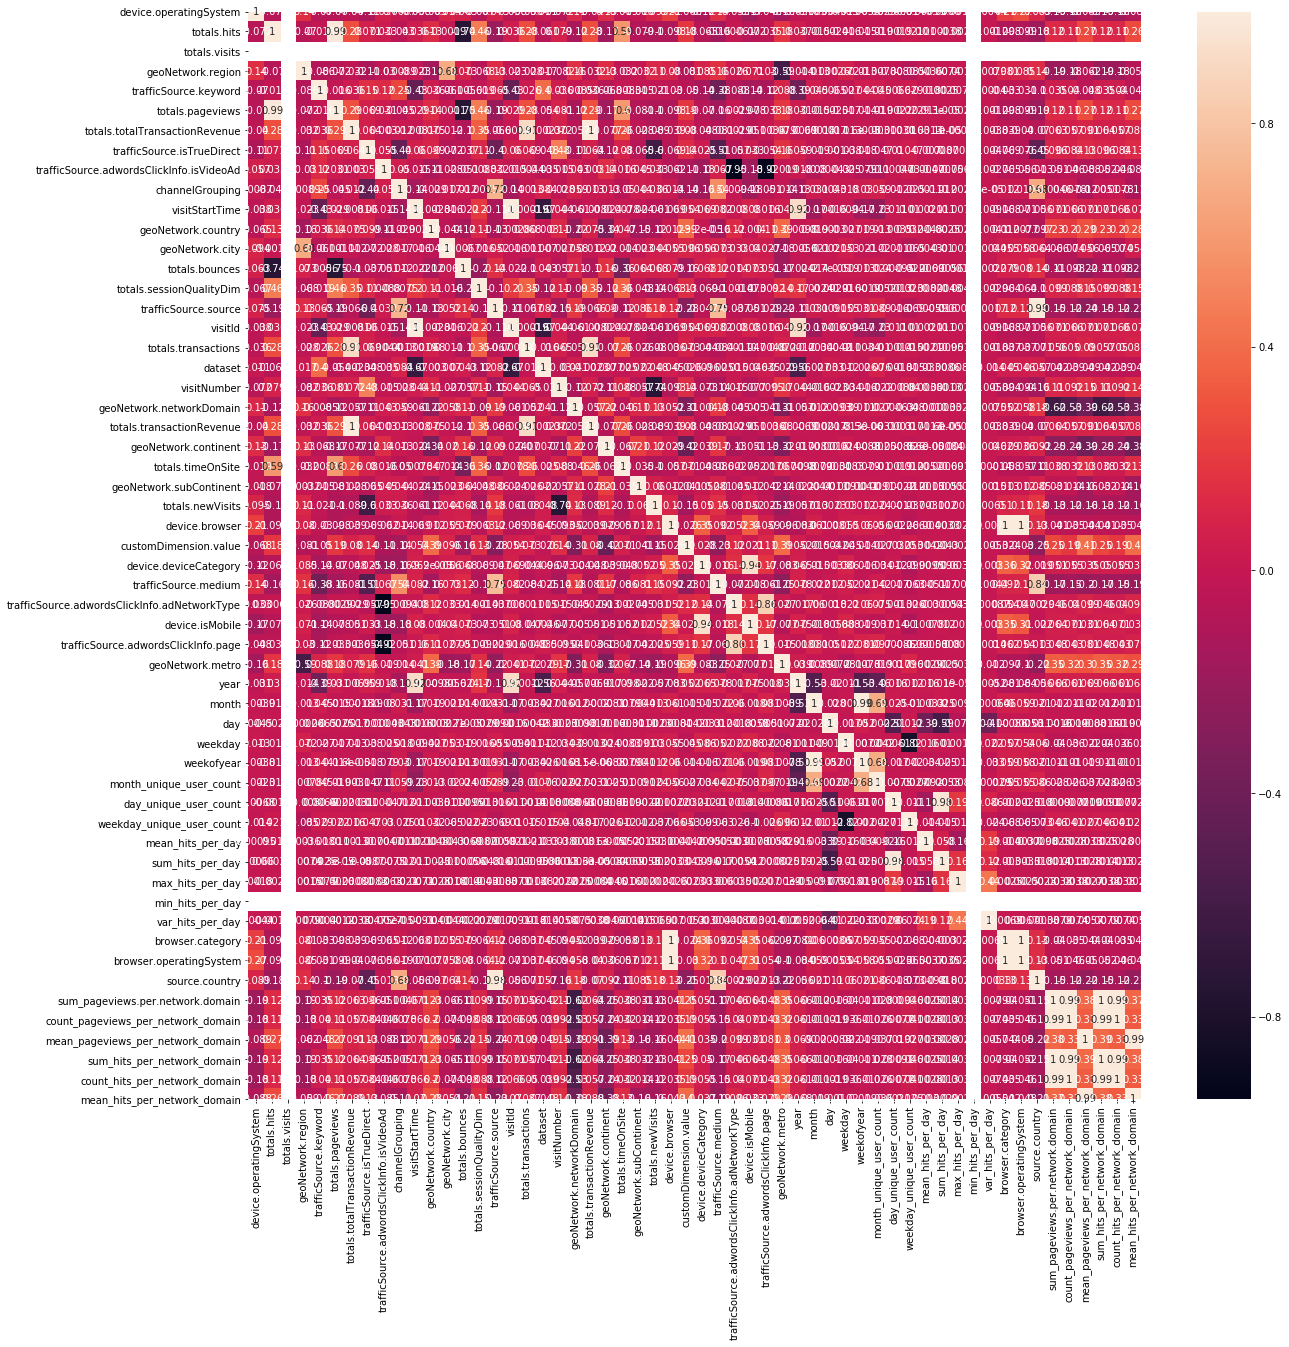

In [32]:
#using heatmap to examine the correlation amongs the columns
plt.figure(figsize=(20,20))
sns.heatmap(rff.corr(),annot=True)

In [36]:
#üsing the pps
pps_matrix = pps.matrix(rff)

In [37]:
# heatmap
fig = go.Figure(
    data = go.Heatmap(
        z = pps_matrix.values,
        x = pps_matrix.index,
        y = pps_matrix.columns
    )
)
fig.update_layout(title_text = 'Predictive Power Score Heatmap')
fig.show()

In [34]:
#get the corellation usinf the corr() method
correla = rff.corr()
correla

device.operatingSystem  \
device.operatingSystem                                      1.000000   
totals.hits                                                -0.071804   
totals.visits                                                    NaN   
geoNetwork.region                                           0.141399   
trafficSource.keyword                                      -0.069963   
totals.pageviews                                           -0.070242   
totals.totalTransactionRevenue                             -0.040318   
trafficSource.isTrueDirect                                 -0.110731   
trafficSource.adwordsClickInfo.isVideoAd                    0.057453   
channelGrouping                                             0.008663   
visitStartTime                                             -0.037959   
geoNetwork.country                                         -0.064633   
geoNetwork.city                                             0.094237   
totals.bounces                                              0.062729   
totals.sessionQualityDim                                   -0.067266   
trafficSource.source                                        0.075034   
visitId                                                    -0.037959   
totals.transactions                                        -0.036131   
dataset                                                     0.010964   
visitNumber                                                -0.072138   
geoNetwork.networkDomain                                    0.109080   
totals.transactionRevenue                                  -0.040379   
geoNetwork.continent                                        0.130725   
totals.timeOnSite                                          -0.019239   
geoNetwork.subContinent                                    -0.018033   
totals.newVisits                                            0.094550   
device.browser                                              0.213139   
customDimension.value                                      -0.068400   
device.deviceCategory                                      -0.118484   
trafficSource.medium                                        0.139998   
trafficSource.adwordsClickInfo.adNetworkType               -0.033349   
device.isMobile                                            -0.169232   
trafficSource.adwordsClickInfo.page                        -0.048381   
geoNetwork.metro                                           -0.156856   
year                                                       -0.031119   
month                                                      -0.003938   
day                                                         0.004523   
weekday                                                     0.012753   
weekofyear                                                 -0.003775   
month_unique_user_count                                    -0.002344   
day_unique_user_count                                      -0.006804   
weekday_unique_user_count                                  -0.014158   
mean_hits_per_day                                           0.000949   
sum_hits_per_day                                           -0.006643   
max_hits_per_day                                            0.001831   
min_hits_per_day                                                 NaN   
var_hits_per_day                                            0.004373   
browser.category                                            0.209069   
browser.operatingSystem                                     0.267454   
source.country                                              0.088641   
sum_pageviews.per.network.domain                           -0.185702   
count_pageviews_per_network_domain                         -0.183365   
mean_pageviews_per_network_domain                          -0.088791   
sum_hits_per_network_domain                                -0.185687   
count_hits_per_network_domain                              -0.183365   
mean_hits_per_

In [35]:
#correlation with the the target 
correla[['totals.totalTransactionRevenue']].sort_values(by='totals.totalTransactionRevenue',ascending = False)

totals.totalTransactionRevenue
totals.totalTransactionRevenue                                      1.000000
totals.transactionRevenue                                           0.999890
totals.transactions                                                 0.912275
totals.sessionQualityDim                                            0.345829
totals.pageviews                                                    0.288946
totals.hits                                                         0.281859
totals.timeOnSite                                                   0.257204
mean_pageviews_per_network_domain                                   0.090990
mean_hits_per_network_domain                                        0.088567
customDimension.value                                               0.080269
geoNetwork.metro                                                    0.079483
geoNetwork.country                                                  0.074611
visitNumber                                                         0.071987
trafficSource.isTrueDirect                                          0.063954
sum_hits_per_network_domain                                         0.063695
sum_pageviews.per.network.domain                                    0.063464
count_pageviews_per_network_domain                                  0.057021
count_hits_per_network_domain                                       0.057021
trafficSource.keyword                                               0.036080
weekday_unique_user_count                                           0.016488
channelGrouping                                                     0.012474
trafficSource.adwordsClickInfo.isVideoAd                            0.002984
trafficSource.adwordsClickInfo.adNetworkType                        0.002947
day                                                                 0.001678
mean_hits_per_day                                                   0.001251
weekofyear                                                          0.000016
sum_hits_per_day                                                   -0.000031
month                                                              -0.000175
day_unique_user_count                                              -0.000313
max_hits_per_day                                                   -0.000809
dataset                                                            -0.002251
month_unique_user_count                                            -0.003116
trafficSource.adwordsClickInfo.page                                -0.003623
var_hits_per_day                                                   -0.003785
year                                                               -0.006907
visitStartTime                                                     -0.008088
visitId                                                            -0.008088
geoNetwork.city                                                    -0.012049
weekday                                                            -0.013057
geoNetwork.subContinent                                            -0.027962
geoNetwork.region                                                  -0.032161
device.browser                                                     -0.038715
browser.category                                                   -0.039386
browser.operatingSystem                                            -0.039585
device.operatingSystem                                             -0.040318
device.deviceCategory                                              -0.047663
device.isMobile                                                    -0.050951
geoNetwork.networkDomain                                           -0.056847
trafficSource.source                                               -0.065856
source.country                                                     -0.069583
geoNetwork.continent                                               -0.076803
trafficSource.medium                      

In [ ]:
#let use investigate the totals.visits and min_hits_per_day columns. what happened in these columns

In [46]:
rff['totals.visits'].value_counts()

0    2109926
Name: totals.visits, dtype: int64

In [47]:
rff['totals.visits'].nunique()

1

In [48]:
rff['min_hits_per_day'].value_counts()

1.0    2109926
Name: min_hits_per_day, dtype: int64

In [49]:
rff['min_hits_per_day'].nunique()

1

In [ ]:
#these 2 columns have unique values that we missed earlier. it will be included in columns to be drop before further modelling
#from the correlation process, we identified and remove columns that had negative and weak relationship with the target.
#I also dropped the totals.transactionRevenue because it is colinear with the target.

In [64]:
drop_for_ML = ["date",
'totals.totalTransactionRevenue',
'totals.transactionRevenue',
'totals.visits', 
'min_hits_per_day',
'max_hits_per_day',
'trafficSource.adwordsClickInfo.page',
'var_hits_per_day',
'month',
'day_unique_user_count',
'fullVisitorId',
'month_unique_user_count',
'year',
'visitStartTime',
'visitId',
'geoNetwork.city',
'weekday',
'geoNetwork.region',
'device.browser',
'browser.category',
'browser.operatingSystem',
'device.operatingSystem',
'device.deviceCategory',
'device.isMobile',
'geoNetwork.networkDomain',
'trafficSource.source',
'source.country',
'geoNetwork.subContinent',
'geoNetwork.continent',
'trafficSource.medium',
'totals.newVisits',
'totals.bounces',
'sum_hits_per_day']

### 3rd test - Retest all dataset 

In [78]:
x_trn_rff3 = train_rff.drop(drop_for_ML,axis=1)
x_tst_rff3 = test_rff.drop(drop_for_ML,axis=1)
y_trn_rff3 = train_rff['totals.totalTransactionRevenue']
y_tst_rff3 = test_rff['totals.totalTransactionRevenue']

In [66]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(y_trn_rff3) for _ in range(len(y_tst_rff3))]),
          true = y_tst_rff3)

RMSE:       1.9103202785490805
MAE:        0.39514840347721303


In [79]:
third_test = RandomForestRegressor(**first_param)

trained_rff3 = third_test.fit(x_trn_rff3, y_trn_rff3)

pred_rff3 = trained_rff3.predict(x_tst_rff3)

In [80]:
get_error(pred =pred_rff3, true = y_tst_rff3)

RMSE:       1.140054600312628
MAE:        0.08231874870018119


# Tuning and optimizing

## RandomizedSearch

In [55]:
# Create the random grid
random_grid = {
    'n_estimators': [25,50,100,250,350,500],
    'max_features': [ 'auto','sqrt'],
    'max_depth': [None,2,5,8,10,15],
    'min_samples_split': [2,6, 8,10 ],
    'min_samples_leaf': [1,2,4, 6],
    'bootstrap': [True],
}

# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in random_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 1152


In [56]:
# use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter =900, # search across n combinations
                               cv = 5,        # n fold cross validation
                               verbose = 2,
                               n_jobs = -1)

# Fit the random search model on purchased datatset
rf_random.fit(x_trainp,y_trainp)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 212.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 267.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 325.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 362.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 412.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 460.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 504.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [92]:
best_tuned = rf_random.best_params_

## GridSearchCV

In [81]:
# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [90,100,110],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [9,10,11],
    'bootstrap': [True],
}
# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in param_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 18


In [82]:
# run the grid search
# init new rf instance
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(x_trainp,y_trainp)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [83]:
best_grid = grid_search.best_params_

In [84]:
best_grid

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

# RETEST WITH TUNED PARAMETERS

In [88]:
x_trn_rff4 = train_rff.drop(drop_for_ML,axis=1)
x_tst_rff4 = test_rff.drop(drop_for_ML,axis=1)
y_trn_rff4 = train_rff['totals.totalTransactionRevenue']
y_tst_rff4 = test_rff['totals.totalTransactionRevenue']

In [93]:
#using best grid parameters
fourth_test = RandomForestRegressor(**best_tuned)

trained_rff4 = fourth_test.fit(x_trn_rff4, y_trn_rff4)

pred_rff4 = trained_rff4.predict(x_tst_rff4)

In [94]:
get_error(pred =pred_rff4, true = y_tst_rff4)

RMSE:       1.1415641498806839
MAE:        0.08243988657112435


In [ ]:
#with the tuned parameters the result is weaker that before. but better than the baseline. further investigation is needed.

In [96]:
x_trn_rff5 = train_rff.drop(drop_for_ML,axis=1)
x_tst_rff5 = test_rff.drop(drop_for_ML,axis=1)
y_trn_rff5 = train_rff['totals.totalTransactionRevenue']
y_tst_rff5 = test_rff['totals.totalTransactionRevenue']

In [97]:
#using the first_param ,just to conpare the result
fifth_test = RandomForestRegressor(**first_param)

trained_rff5 = fifth_test.fit(x_trn_rff5, y_trn_rff5)

pred_rff5 = trained_rff5.predict(x_tst_rff5)

In [98]:
get_error(pred =pred_rff5, true = y_tst_rff5)

RMSE:       1.1409207941640083
MAE:        0.08238419090160276


In [ ]:
#worst result . maybe because the drop column had predicive power